# Tarea 2: Santiago Ontañón Sánchez

## 1. Histogramas

Lo primero que vemos es la documentaci\'on de la funci\'on `randn`:

In [1]:
?randn

search: 

```
randn([rng], [dims...])
```

Generate a normally-distributed random number with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers.


Un ejemplo:

In [2]:
randn()

randn randn! sprandn randstring rand! rand randexp randperm randjump



-0.8879199747091013

El ejercicio pide expl\'icitamente que se generen n\'umeros de tipo `Float64`, pero esto es por default:

In [3]:
typeof(ans)

Float64

Ahora, crear $N$ valores es trivial utilizando un ciclo `while`. Primero especificamos el valor $N$ a usarse:

In [4]:
N = 10000

10000

Luego inicializamos el arreglo `data` de tal manera que sea una lista vac\'ia.

In [5]:
data = [];

In [6]:
typeof(data)

Array{Any,1}

La parte clave es simplemente iterar sobre los comoponentes de `data` y cada entrada hacerla un n\'umero aleatorio con `randn` con un ciclo `while` y un contador `i`.

In [7]:
i = 1
while i <= N
    push!(data, randn())
    i = i + 1
end

In [8]:
data

10000-element Array{Any,1}:
 -1.70648  
 -1.50641  
 -0.224537 
 -1.40496  
 -0.0969046
 -1.54203  
  1.89791  
 -0.360985 
  1.24355  
 -1.09158  
  0.935885 
 -0.335029 
  0.0441857
  ⋮        
  0.0131589
  1.3191   
  0.209572 
 -0.43477  
 -0.961238 
 -1.59692  
 -0.809105 
 -1.66946  
 -0.628866 
  1.3003   
  0.233226 
  2.1037   

Ahora quisi\'eramos inicializar el arreglo $n_{hist}$ pero para hacer esto necesitamos el m\'aximo y m\'inimos del arreglo `data` y el n\'umero de `bins` que vamos a hacer. Este es el argumento de la funci\'on que vamos a implementar, pero para empezar, un buen n\'umero corresponde a tener $N/100$ `bins`. 

In [9]:
n_bins = 100

100

Ahora utilizamos las funciones `maximum` y `minimum` para obtener la separaci\'on entre `bins`.

In [10]:
sup = maximum(data)

3.7111174367610316

In [11]:
inf = minimum(data)

-3.552044738175339

In [12]:
len_bin = (sup - inf)/n_bins

0.0726316217493637

Ahora podemos inicializar el arreglo $n_{hist}$ como uno con puros zeros(de tipo `Int64`) y de dimensi\'on $n_{bins}$:

In [13]:
n_hist = zeros(Int64, n_bins)

100-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

Ahora viene la parte clave del ejercicio, leer los datos y organizarlos en cada `bin`. Queremos leer un dato s\'olo una vez, es decir, no queremos recorrer los `bins` y adentro de cada `bin` recorrer todos los datos para ver si cada uno est\'a en dicho `bin` porque as\'i se leer\'ian los datos $n_{bin}$ veces. Lo que se hace es sacar para cada dato su \'indice que le corresponde. Esto se hace contanto desde el \'infimo y dividiendo entre la longitud del `bin`. Por ejemplo, para el m\'inimo:

In [14]:
floor(Int64,(minimum(data)-inf)/len_bin)

0

Lo que significa que est\'a en el \'indice 0 + 1 del arreglo $n_{hist}$, cosa que tiene sentido. Sin embargo, hay un problema para los valores para los cuales se tiene un dato igual a `maximum(data)`:

In [15]:
floor(Int64, (maximum(data)-inf)/len_bin)

100

I.e. est\'a en el \'indice 100 + 1 = 101, que est\'a fuera de rango para nuestro arreglo de longitud $n_{bins}$. Lo que hacemos es meter estos valores en el bin anterior. Ahora es muy claro c\'omo obtenemos cada \'indice para cada dato `d` con un ciclo `for`.

In [16]:
for d in data
    i = floor(Int64, (d-inf)/len_bin) + 1
    i = (i > n_bins) ? n_bins : i
    n_hist[i] = n_hist[i] + 1
end

In [17]:
n_hist

100-element Array{Int64,1}:
 2
 3
 2
 0
 4
 2
 3
 1
 3
 6
 4
 4
 7
 ⋮
 3
 6
 2
 3
 3
 1
 3
 1
 0
 0
 1
 1

Ahora simplemente graficamos nuestro histograma:

In [18]:
using PyPlot

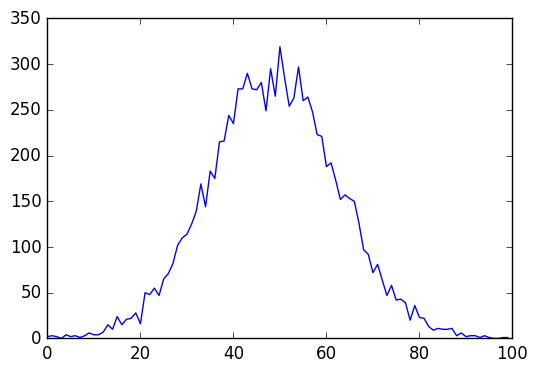

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f65462ee0d0>

In [19]:
figure(figsize = (6, 4))
plot(n_hist)

Con todo lo anterior que muestra c\'omo funciona el proceso de obtener el resultado ahora s\'i lo implementamos en una sola funci\'on:

In [20]:
""" 
histogram_randn(n_bins)

Esta funci\'on toma como entrada un entero n_bins (y solamente un entero, de otro
modo es inv\'alida). Primero se calcula un arreglo de datos con n\'umeros aleatorios.
Dicho arreglo abarca un intervalo [minimum(data), maximum(data)] que se parte en
n_bins subintervalos del mismo tama\~no. Se regresa un n_hist tipo Array{Int64,1} 
de dimensi\'on n_bins que trae en la entrada n_hist[i] el n\'umero de datos que
entraron en dicho intervalo.
"""
function histogram_randn{T <: Int64}(n_bins::T)
    # Lo primero que se hace es verificar que efectivamente n_bin es un n\'umero
    # entero, de otro modo la funci\'on no corre.
    # Despu\'es tenemos que generar nuestros datos. El n\'umero es arbitrario
    # y lo elegimos como dice el inciso, N = 10000.
    N = 10000
    # Inicializamos el arreglo vac\'io data que ser\'a llenado con n\'umeros
    # aleatorios.
    data = []
    # Con un sencillo contador i y un ciclo while se llena el arreglo.
    i = 1
    while i <= N
        push!(data, randn()) # La funci\'on !push equivale a python list.append()
        i = i + 1
    end
    # Con el arreglo lleno de datos, procedemos a encontrar los supremos e
    # \'infimos.
    sup = maximum(data)
    inf = minimum(data)
    # Con estos valores se puede calcular len_bin
    len_bin = (sup - inf)/n_bins
    # Ahora se inicializa el arreglo de tama\~no n_bins que tiene las frecuencias
    # no normalizadas. Se inicializa naturalmente, lleno de ceros.
    n_hist = zeros(Int64, n_bins)
    # Despu\'es, con un ciclo for, se le asigna a cada dato un \'indice que es su
    # n\'umero de bin y dicho bin se incrementa en uno.
    for d in data
        i = floor(Int64, (d-inf)/len_bin) + 1 # Como se ve, se est\'a calculando el
        # n\'umero de longitudes len_bin que se encuentra un dato desde el m\'inimo
        # este n\'umero de longitudes m\'as uno (pues el m\'inimo est\'a en el bin
        # 1 no el bin 0) es el \'indice. Excepto si...
        i = (i > n_bins) ? n_bins : i # Esta sutileza viene de la convenci\'on de que
        # n_hist[1] es el primer bin y debe contener a minimum(data), pero del mismo
        # modo n_hist[n_bins] contiene al \'ultimo bin y dentro se considera a 
        # maximum(data), s\'olo que nuestro indexado de la l\'inea anterior lo
        # meter\'ia en el siguiente bin y estar\'ia fuera de rango. Lo que se hace es
        # meter este valor en el \'ultimo bin con un sencillo if.
        n_hist[i] = n_hist[i] + 1
    end
    # Finalmente se regresa el arreglo de frecuencias.
    return n_hist
end

histogram_randn (generic function with 1 method)

Ahora se dan unos ejemplos. Para diez puntos:

In [21]:
histogram_randn(10)

10-element Array{Int64,1}:
   27
  175
  838
 2164
 3007
 2451
 1052
  238
   44
    4

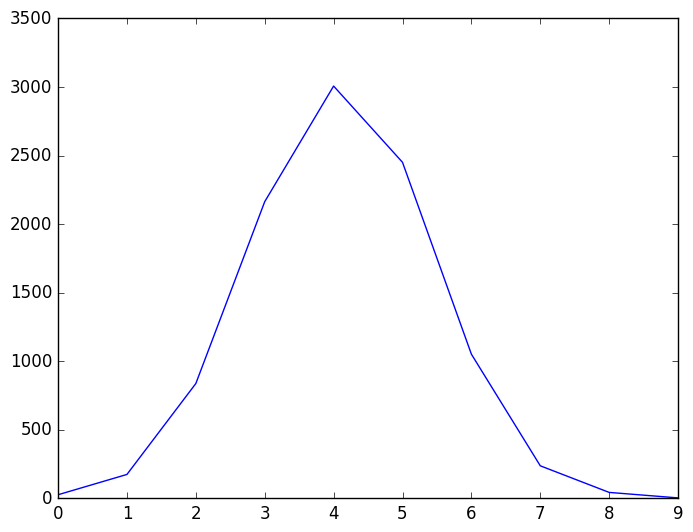

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6545fe9790>

In [22]:
plot(ans)

Con 1000 puntos se aprecia muy bien la forma de la gaussiana:

In [23]:
histogram_randn(1000)

1000-element Array{Int64,1}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1

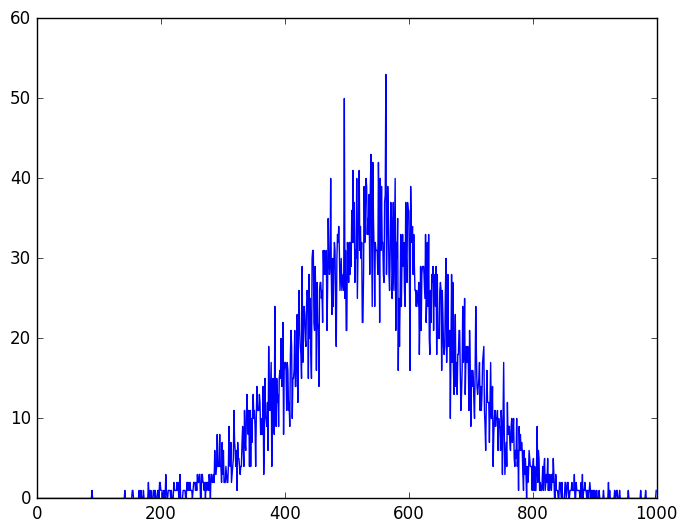

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6545f2f190>

In [24]:
plot(ans)

Sin embargo, si se hace un n\'umero de divisiones del orden o mayor al n\'umero de datos se pierde por completo la forma porque ahora en cada `bin` s\'olo hay a veces un s\'olo dato aunque se est\'e en la regi\'on del m\'aximo de la gaussiana:

In [25]:
histogram_randn(10000)

10000-element Array{Int64,1}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1

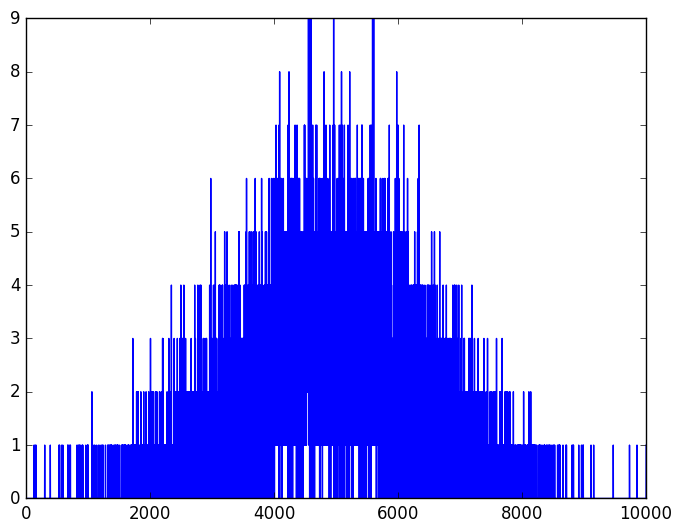

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6545e56c90>

In [26]:
plot(ans)

En efecto, con m\'as bins que datos se vuelve rid\'iculo:

In [27]:
histogram_randn(100000)

100000-element Array{Int64,1}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1

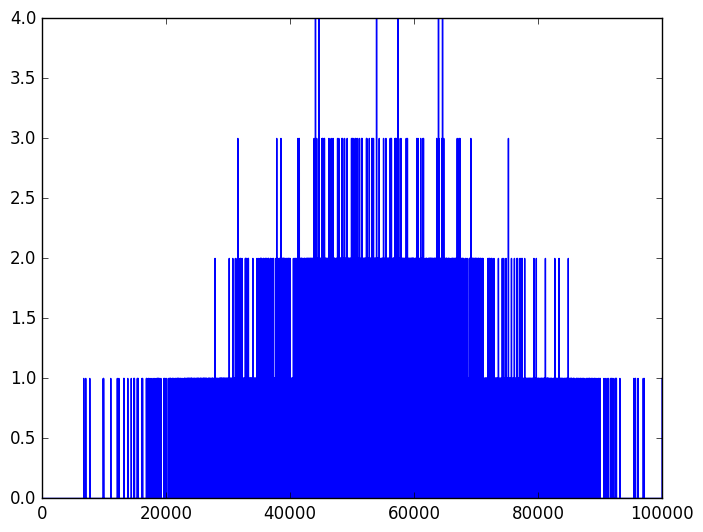

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6545d8ff90>

In [28]:
plot(ans)

Con esto en mente, modificamos la funci\'on para que no nos deje hacer estas cosas:

In [29]:
""" 
histogram_randn_pretty(n_bins)

Esta funci\'on toma como entrada un entero n_bins (y solamente un entero, de otro
modo es inv\'alida). Primero se calcula un arreglo de datos con n\'umeros aleatorios.
Dicho arreglo abarca un intervalo [minimum(data), maximum(data)] que se parte en
n_bins subintervalos del mismo tama\~no. Se regresa un n_hist tipo Array{Int64,1} 
de dimensi\'on n_bins que trae en la entrada n_hist[i] el n\'umero de datos que
entraron en dicho intervalo.

Si n_bins es mayor que el n\'umero de datos N = 10000 se toma por default
n_bins = floor(N/10).
"""
function histogram_randn_pretty{T <: Int64}(n_bins::T)
    # Lo primero que se hace es verificar que efectivamente n_bin es un n\'umero
    # entero, de otro modo la funci\'on no corre.
    # Despu\'es tenemos que generar nuestros datos. El n\'umero es arbitrario
    # y lo elegimos como dice el inciso, N = 10000.
    N = 10000
    # Ahora la condici\'on de que nbins no sea mayor que floor(N/10)
    n_bins = (n_bins < floor(Int64,N/10)) ? n_bins : floor(Int64,N/10)
    # Inicializamos el arreglo vac\'io data que ser\'a llenado con n\'umeros
    # aleatorios.
    data = []
    # Con un sencillo contador i y un ciclo while se llena el arreglo.
    i = 1
    while i <= N
        push!(data, randn()) # La funci\'on !push equivale a python list.append()
        i = i + 1
    end
    # Con el arreglo lleno de datos, procedemos a encontrar los supremos e
    # \'infimos.
    sup = maximum(data)
    inf = minimum(data)
    # Con estos valores se puede calcular len_bin
    len_bin = (sup - inf)/n_bins
    # Ahora se inicializa el arreglo de tama\~no n_bins que tiene las frecuencias
    # no normalizadas. Se inicializa naturalmente, lleno de ceros.
    n_hist = zeros(Int64, n_bins)
    # Despu\'es, con un ciclo for, se le asigna a cada dato un \'indice que es su
    # n\'umero de bin y dicho bin se incrementa en uno.
    for d in data
        i = floor(Int64, (d-inf)/len_bin) + 1 # Como se ve, se est\'a calculando el
        # n\'umero de longitudes len_bin que se encuentra un dato desde el m\'inimo
        # este n\'umero de longitudes m\'as uno (pues el m\'inimo est\'a en el bin
        # 1 no el bin 0) es el \'indice. Excepto si...
        i = (i > n_bins) ? n_bins : i # Esta sutileza viene de la convenci\'on de que
        # n_hist[1] es el primer bin y debe contener a minimum(data), pero del mismo
        # modo n_hist[n_bins] contiene al \'ultimo bin y dentro se considera a 
        # maximum(data), s\'olo que nuestro indexado de la l\'inea anterior lo
        # meter\'ia en el siguiente bin y estar\'ia fuera de rango. Lo que se hace es
        # meter este valor en el \'ultimo bin con un sencillo if.
        n_hist[i] = n_hist[i] + 1
    end
    # Finalmente se regresa el arreglo de frecuencias.
    return n_hist
end

histogram_randn_pretty (generic function with 1 method)

In [30]:
histogram_randn_pretty(100000)

1000-element Array{Int64,1}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1

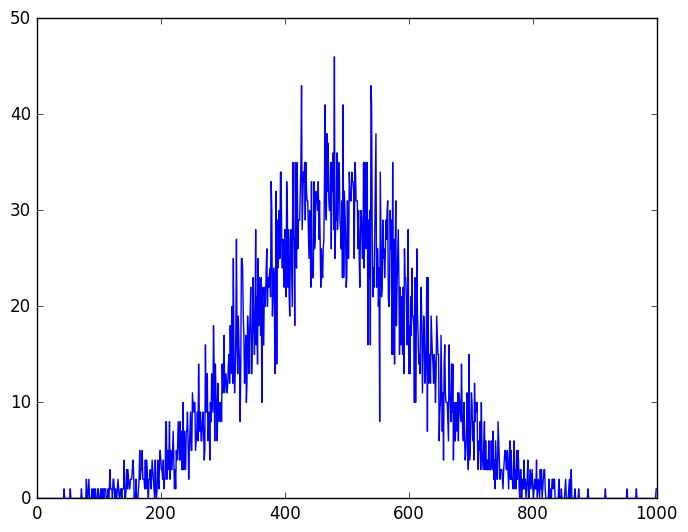

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6545ccbad0>

In [31]:
plot(ans)

Lo \'ultimo que procede a este ejercicio es implementar la funci\'on de PyPlot para histogramas. La referencia es https://gist.github.com/gizmaa/7214002#histogram

B\'asciamente el uso es `PyPlot.plt.hist(x,nbins)` donde `x` es el arreglo de datos y `nbins` es obviamente el n\'umero de `bins` en que se van a partir los datos. La manera de referenciar `PyPlot.plt.hist` es algo distinta en `Julia`.

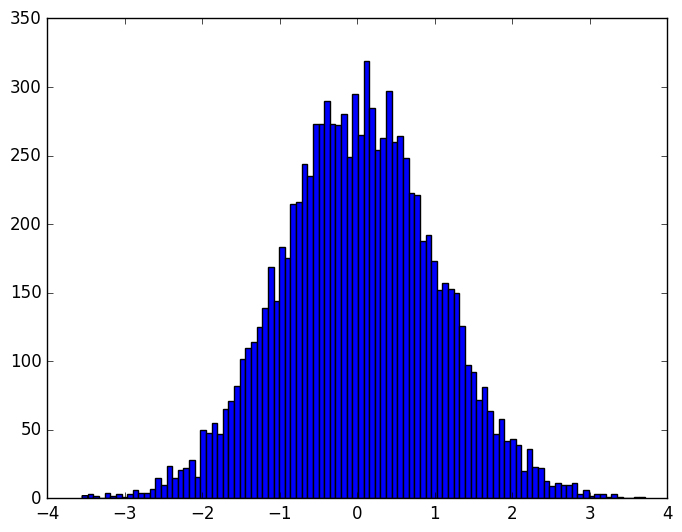

([2.0,3.0,2.0,0.0,4.0,2.0,3.0,1.0,3.0,6.0  …  2.0,3.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0],[-3.55204,-3.47941,-3.40678,-3.33415,-3.26152,-3.18889,-3.11626,-3.04362,-2.97099,-2.89836  …  3.05743,3.13006,3.2027,3.27533,3.34796,3.42059,3.49322,3.56585,3.63849,3.71112],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f6545e26650>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545c21ed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545c29250>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545c02d50>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545c02ed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545c32210>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545bbf910>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545bbf5d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545c02910>,PyObject <matplotlib.patches.Rectangle object at 0x7f6545c0dbd0>  …  PyObject <matplotlib.patches.Rectangle object at 0x7f6545a4f510>,PyObject <matpl

In [32]:
plt[:hist](data,n_bins)

## 2. Promedio y varianza

(a). Implementamos r\'apidamente una funci\'on que nos d\'e los datos aleatorios:

In [33]:
function get_data()
    n = 10000
    # Inicializamos el arreglo vac\'io data que ser\'a llenado con n\'umeros
    # aleatorios.
    data = []
    # Con un sencillo contador i y un ciclo while se llena el arreglo.
    i = 1
    while i <= n
        push!(data, randn()) # La funci\'on !push equivale a python list.append()
        i = i + 1
    end
    return collect(Float64, data) # Se regresa un Array{Float64,1}.
end

function get_data{T <: Int64}(n::T)
    # En el caso de que queramos un n\'umero de datos definidos.
    # Inicializamos el arreglo vac\'io data que ser\'a llenado con n\'umeros
    # aleatorios.
    data = []
    # Con un sencillo contador i y un ciclo while se llena el arreglo.
    i = 1
    while i <= n
        push!(data, randn()) # La funci\'on !push equivale a python list.append()
        i = i + 1
    end
    return collect(Float64, data)
end

get_data (generic function with 2 methods)

Queremos calcular el promedio de estos datos. Sencillamete debemos sumarlos todos y dividirlos entre la longitud de ellos.

In [34]:
data = get_data()    

10000-element Array{Float64,1}:
 -1.07174 
 -0.47837 
  0.130953
 -0.164728
 -1.12727 
  1.77281 
  0.153405
  0.777622
 -0.707984
 -0.876467
 -0.708854
 -0.474847
  0.385033
  ⋮       
 -2.06596 
  1.13854 
  1.74422 
  0.764855
  1.98539 
 -1.64364 
 -0.421386
 -0.830376
 -0.15307 
  0.3511  
  0.635889
 -0.604486

In [35]:
"""
get_avg(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
promedio.
"""
function get_avg{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # Se calcula el promedio de manera usual.
    s = 0.0
    for d in data
        s = s + d
    end
    return s/length(data)
end

get_avg (generic function with 1 method)

Para nuestro archivo, el promedio ser\'ia:

In [36]:
get_avg(data)

-0.025934342781644613

La varianza se calcula de la manera habitual tambi\'en:

In [37]:
"""
get_var(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
varianza.
"""
function get_var{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # No queremos arreglos de longitud uno o menos pues son triviales.
    if length(data) <= 1
        return Void
    end
    # Se calcula la varianza de manera usual.
    s = 0.0
    av = get_avg(data) # Obtenemos el promedio con la funci\'on anterior.
    for d in data
        s = s + (d-av)^2
    end
    return s/(length(data)-1) # Este length(data) -1 es una cuesti\'on de
    # convenci\'on , coincide con la convenci\'on que utiliza Julia en su
    # funci\'on var(data).
end

get_var (generic function with 1 method)

La varianza $s^2$ para estos datos es

In [38]:
get_var(data)

0.9967664634345114

Ahora comprobamos con las funciones de `Julia`:

In [39]:
mean(data)

-0.025934342781644592

In [40]:
var(data)

0.9967664634345049

Es claro que coinciden muy bien, la diferencia viene a partir de la cifra 14 decimal. En cuanto a su tiempo de c\'omputo para cada una:

In [41]:
@time get_avg(data); @time get_avg(data)

-0.025934342781644613

In [42]:
@time mean(data); @time mean(data)

-0.025934342781644592

In [43]:
@time get_var(data); @time get_var(data)

0.9967664634345114

In [44]:
@time var(data); @time var(data)

0.9967664634345049

Se ve que las funciones propias de Julia son m\'as r\'apidas hasta ahora pero n\'otese que nuestra funci\'on `get_var` ocupa casi la mitad de memoria que la funci\'on `var`, seguramente porque el c\'alculo del promedio se hace afuera. Continuaremos esta discusi\'on en el inciso (c).

(b). Ahora implementamos el algoritmo recursivo.

Para la media:
    $$\bar{x}_n = \bar{x}_{n-1} +\frac{x_n-\bar{x}_{n-1}}{n}$$

In [45]:
"""
get_avg_online(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
promedio de manera recursiva. V\'ease https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm
"""
function get_avg_online{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # Se calcula recursivamente la media de acuerdo a la referencia.
    s = 0.0
    for (i, d) in enumerate(data)
        s = s + (d-s)/i 
    end
    return s
end

get_avg_online (generic function with 1 method)

In [46]:
get_avg_online(data)

-0.02593434278164459

Para la varianza volvemos a resaltar que estamos tratando en este caso (para ser consistentes con `Julia`) con la varianza de una muestra. As\'i el algoritmo que se usa es el que tiene estabilidad num\'erica segu\'un la referencia https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm

$$s^2_n = \frac{M_{2,n}}{n-1},\qquad M_{2,n}=M_{2,n-1} + (x_n-\bar{x}_{n-1})(x_n -\bar{x}_n)$$

In [47]:
"""
get_var_online(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
varianza de manera recursiva. V\'ease https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm
"""
function get_var_online{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # No queremos arreglos de longitud uno o menos pues son triviales.
    if length(data) <= 1
        return Void
    end
    # Se calcula recursivamente la media de acuerdo a la referencia.
    s = 0.0
    M = 0.0
    p = 0.0
    p_new = 0.0
    for (i, d) in enumerate(data)
        if i == 1 # Para el primer dato no se calcula la varianza pero s\'i
            #las otras cantidades.
            p_new = p + (d-p)/i  # El promedio hasta el dato i seg\'un la manera 
            # recursiva de la funci\'on anterior.
            M = M + (d-p)*(d-p_new) # La cantidad M_{2,n} seg\'un la f\'ormula.
            # Se ve que se usan los dos promedios anteriores.
            p = p_new # Se reasignan los promedios.
            continue
        end
        p_new = p + (d-p)/i  # El promedio hasta el dato i seg\'un la manera 
        # recursiva de la funci\'on anterior.
        M = M + (d-p)*(d-p_new)
        p = p_new
        s = M/(i-1)
    end
    return s
end

get_var_online (generic function with 1 method)

La varianza es as\'i:

In [48]:
get_var_online(data)

0.9967664634345035

Muy de acuerdo con todos los resultados anteriores hasta la cifra significativa.

(c). Ahora s\'i vamos a comparar los tiempos de ejecuci\'on para distintos datos usando `get_data(n)`. El macro que vamos a utilizar es `@elapsed` porque este devuelve el tiempo de ejecuci\'on a diferencia de `@time` que s\'olo lo imprime.

In [49]:
@elapsed get_var_online(data)

0.000158528

Ahora vamos a hacer una funci\'on sencilla que nos devuelva un arreglo con tres columnas, cada columna con el tiempo de los tres m\'etodos distintos. Ser\'an cinco filas correspondiente la fila $i$ a un archvio de $10^{1+i}$ datos.

In [50]:
function three_methods_avg()
    t = Array{Float64}(5,3) # Se inicializa el arreglo.
    t1 = 0.0
    t2 = 0.0
    t3 = 0.0
    n = 10
    i = 1
    while n <= 100000
        data = get_data(n) # Se obtienen los n datos.
        t1 = @elapsed get_avg(data)
        t1 = @elapsed get_avg(data) # Se ejecutan dos veces los tiempos
        # de compilaci\'on.
        t2 = @elapsed mean(data)
        t2 = @elapsed mean(data)
        t3 = @elapsed get_avg_online(data)
        t3 = @elapsed get_avg_online(data)
        t[i,1] = t1 # Se escriben al arreglo.
        t[i,2] = t2
        t[i,3] = t3
        i = i + 1 # Se aumenta el contador y el orden de magnitud de n.
        n = n * 10
    end
    return t
end

three_methods_avg (generic function with 1 method)

In [51]:
avg_times = three_methods_avg()

5x3 Array{Float64,2}:
 7.9e-8     6.6e-8     1.27e-7    
 1.35e-7    1.27e-7    9.25e-7    
 1.009e-6   3.71e-7    9.058e-6   
 9.747e-6   3.817e-6   9.0478e-5  
 9.7904e-5  4.0842e-5  0.000904816

0.000018 seconds (149 allocations: 10.167 KB)
  0.000014 seconds (5 allocations: 176 bytes)
  0.000008 seconds (5 allocations: 176 bytes)
  0.000006 seconds (5 allocations: 176 bytes)
  0.000024 seconds (5 allocations: 176 bytes)
  0.000022 seconds (5 allocations: 176 bytes)
  0.000014 seconds (8 allocations: 288 bytes)
  0.000011 seconds (8 allocations: 288 bytes)


Una funci\'on completamente an\'aloga para la varianza.

In [52]:
function three_methods_var()
    t = Array{Float64}(5,3) # Se inicializa el arreglo.
    t1 = 0.0
    t2 = 0.0
    t3 = 0.0
    n = 10
    i = 1
    while n <= 100000
        data = get_data(n) # Se obtienen los n datos.
        t1 = @elapsed get_var(data)
        t1 = @elapsed get_var(data) # Se ejecutan dos veces los tiempos
        # de compilaci\'on.
        t2 = @elapsed var(data)
        t2 = @elapsed var(data)
        t3 = @elapsed get_var_online(data)
        t3 = @elapsed get_var_online(data)
        t[i,1] = t1 # Se escriben al arreglo.
        t[i,2] = t2
        t[i,3] = t3
        i = i + 1 # Se aumenta el contador y el orden de magnitud de n.
        n = n * 10
    end
    return t
end

three_methods_var (generic function with 1 method)

In [53]:
var_times = three_methods_var()

5x3 Array{Float64,2}:
 1.23e-7      3.7e-7     1.75e-7    
 2.81e-7      3.21e-7    1.537e-6   
 2.16e-6      1.01e-6    1.5476e-5  
 2.0975e-5    8.978e-6   0.000155748
 0.000204772  8.7966e-5  0.00155357 

Teniendo los arreglos podemos graficarlos.

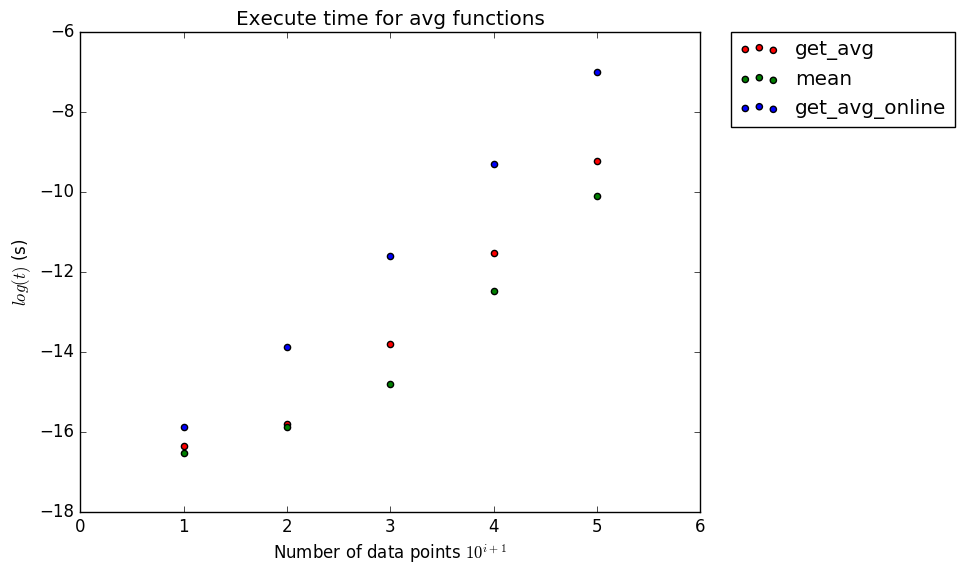

PyObject <matplotlib.legend.Legend object at 0x7f654485da50>

In [78]:
a1 = scatter([1,2,3,4,5],log(avg_times[:,1]),c="r",label = "get_avg"); 
a2 = scatter([1,2,3,4,5],log(avg_times[:,2]), c="g", label = "mean"); 
a3 = scatter([1,2,3,4,5],log(avg_times[:,3]), label = "get_avg_online");
title("Execute time for avg functions")
xlabel(L"Number of data points $10^{i+1}$"L)
ylabel(L"$log(t)$ (s)")
legend(handles = [a1,a2,a3],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

En rojo se ve la implementaci\'on manual `get_avg`, en verde la funci\'on de `Julia` `mean` y en azul la implementaci\'on recursiva `get_avg_online`

Claramente, la funci\'on `mean` tiene el mejor tiempo de ejecuci\'on pero la implementaci\'on manual no se queda muy atr\'as, posiblemente porque es tan sencilla. Para el caso de la varianza se ve un efecto completamente igual:

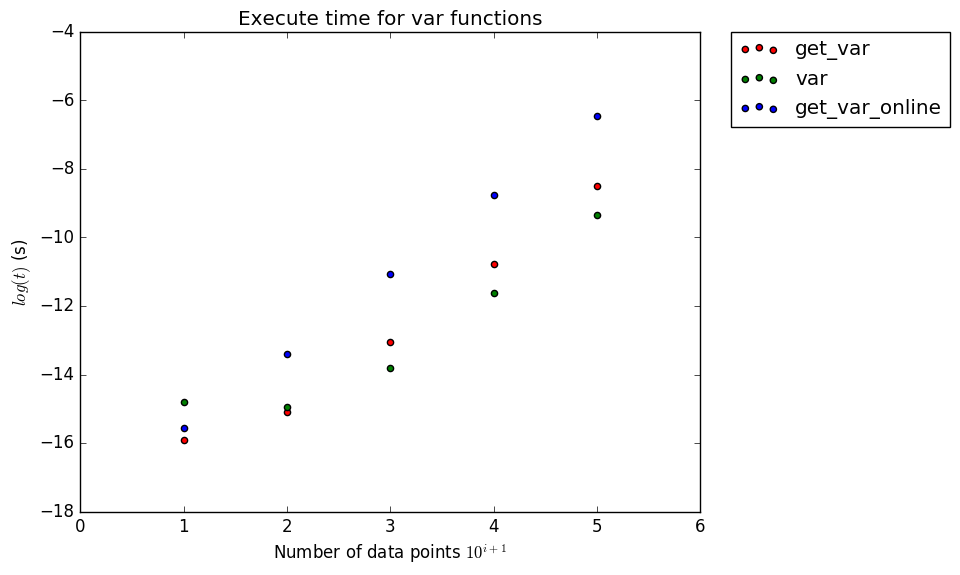

PyObject <matplotlib.legend.Legend object at 0x7f65455698d0>

In [79]:
b1 = scatter([1,2,3,4,5],log(var_times[:,1]),c="r",label = "get_var"); 
b2 = scatter([1,2,3,4,5],log(var_times[:,2]), c="g", label = "var"); 
b3 = scatter([1,2,3,4,5],log(var_times[:,3]), label = "get_var_online");
title("Execute time for var functions")
xlabel(L"Number of data points $10^{i+1}$"L)
ylabel(L"$log(t)$ (s)")
legend(handles = [b1,b2,b3],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. M\'etodo de Simpson

La regla de [simpson](https://en.wikipedia.org/wiki/Simpson%27s_rule) dice que si un intervalo $[a,b]$ est\'a dividido en $n$ subintervalos con $n$ un n\'umero par, la aproximaci\'on a la integral de una funci\'on de una variable est\' dada como

$$\int_a^b f(x)\,dx = \frac{h}{3}\,\left(f(a)+2\,\sum_{j = 1}^{n/2-1}f(x_{2j})+4\,\sum_{j = 1}^{n/2}f(x_{2j-1}) + f(b)\right) $$

donde $h= (b-a)$. La implementaci\'on es muy clara:

In [56]:
"""
simpson(f,a,b,n)

Se implementa el m\'etodo de Simpson https://en.wikipedia.org/wiki/Simpson%27s_rule,
para la funci\'on f, integr\'andola entre los valores reales a y b y dividiendo
dicho intervalo en n subintervalos. Si n es par se har\'an n subintervalos pero si
es impar se har\'an n+1 intervalos pues se requiere un n\'umero par de subintervalos.
Se regresa el valor aproximado de la integral.
"""
function simpson(f::Function, a::Real, b::Real, n::Int64)
    # Lo primero que hacemos despu\'es de declarar las variables y ver que
    # n no sea menor que cero, es ver si n, el n\'umero de subintervalos es
    #par. Si s\'i lo es queda igual, si no se aumenta en uno para serlo.
    if n <= 0
        return Void
    end
    n = (n % 2 == 0) ? n : n + 1
    # Ahora se declara h, la subdivisi\'on.
    h = (b-a)/n
    # Del mismo modo, el arreglo de x_1 a x_{n-1}
    x_range = a+h:h:b-h
    # La integral se inicializa con los valores h*(f(a)+f(b))/3.
    i = (f(a)+f(b))*h/3
    # Se inicializa una bandera que nos dice si el valor x_i tiene i impar
    # o par. Empieza en cero, dicendo que es impar con x_1.
    j = 0
    # Se realizan las sumas:
    for x in x_range
        # Primero el caso de x_i con i impar que tiene la suma multiplicada
        # por cuatro seg\'un la f\'ormula.
        if j == 0
            i = i + 4*h*f(x)/3
            # Se cambia la bandera porque la siguiente x_i tendr\'a i par.
            j = 1
            # Se continua con el siguiente ciclo.
            continue
        end
        # Lo mismo pero ahora para las pares.
        if j ==1
            i = i + 2*h*f(x)/3
            j = 0
            continue
        end
    end
    # Se regresa la integral.
    return i
end

simpson (generic function with 1 method)

Probemos para la funci\'on seno:

In [57]:
f(x) = sin(x)

f (generic function with 1 method)

In [58]:
simpson(f,0.0,pi,100)

2.0000000108245035

Se ve con 100 puntos ya se tiene una aproximaci\'on hasta la octava cifra decimal, recordemos que el error va como

$$\frac{h^4}{180}\,(b-a)\,\text{max}\left|f^{(4)}(\xi)\right|_{\xi\in[a,b]}$$

Para el caso anterior, `h = pi/100` y la derivada est\'a acotada por 1, as\'i que se predice un error de:

In [80]:
(pi/100)^4*pi/180

1.7001093599182307e-8

Justo en la octava cifra decimal como se dijo.